# Notebook #4: Estandarización

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss


- Importamos el dataframe generado en el notebook anterior y lo comprobamos, así como sus columnas y tipos de datos.

In [2]:
df = pd.read_csv("../../datos/modelo1/csv_sin_outliers.csv", index_col=0)
df.head(3)

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True,municipality,floor,hasLift
0,750.0,60.0,7037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,706.857143,698.088889,703.847953
1,750.0,70.0,16145,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,735.576450,678.344828,694.703226
2,590.0,56.0,11728,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,643.725806,678.568966,694.703226


- Aplicaremos los escaladores a las columnas numéricas size y distance, y los graficaremos.

In [3]:
df_escaladores_graf = ss.aplicar_escaladores(df, ["size", "distance"], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [4]:
df_escaladores_graf.columns

Index(['price', 'size', 'distance', 'propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True', 'municipality',
       'floor', 'hasLift', 'size_robust', 'distance_robust', 'size_minmax',
       'distance_minmax', 'size_standard', 'distance_standard',
       'size_normalizer', 'distance_normalizer'],
      dtype='object')

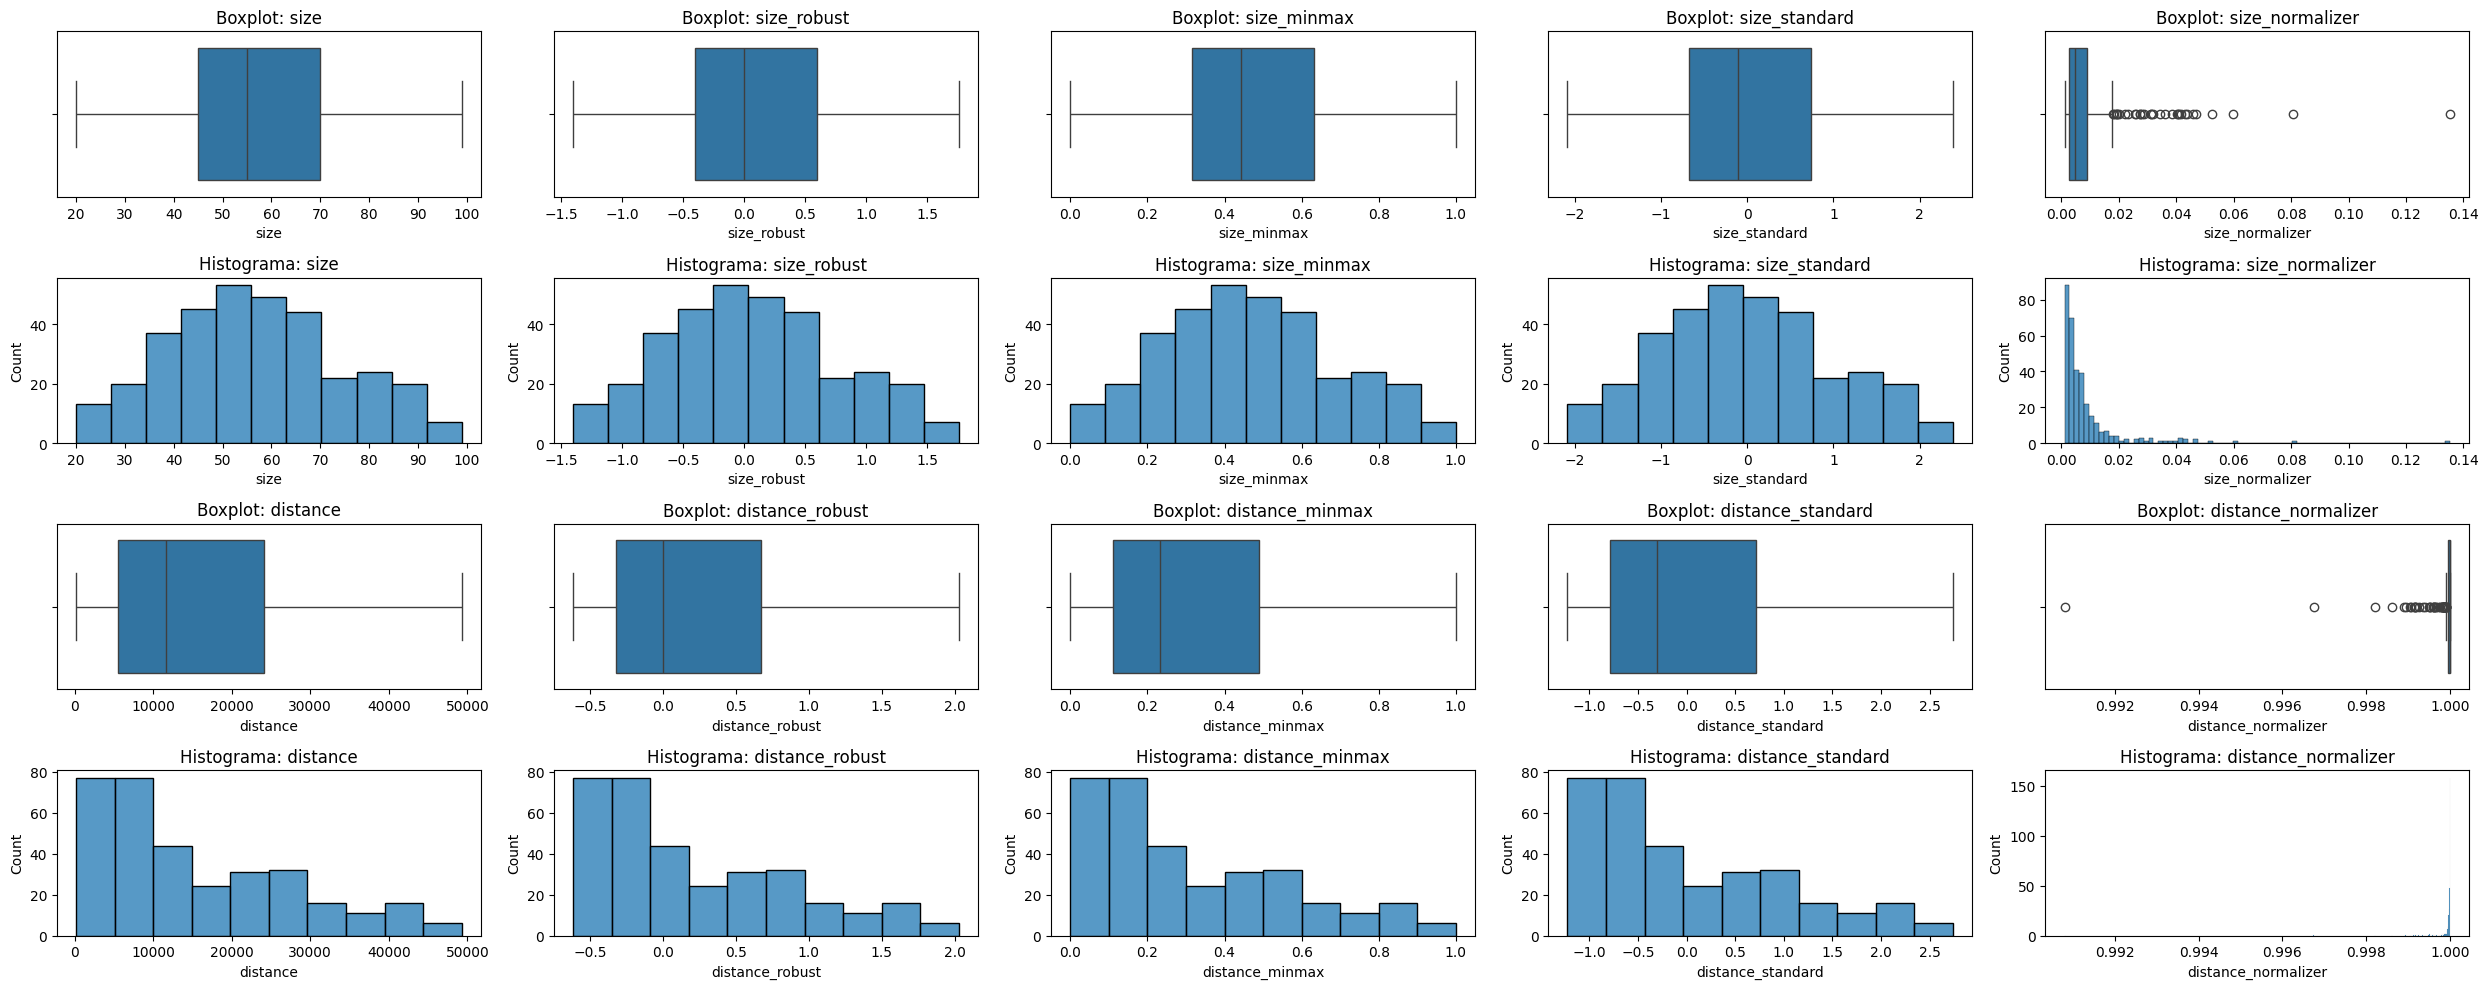

In [5]:
ss.graficar_escaladores(df_escaladores_graf, ["size", "distance"], ['size_robust',
       'distance_robust', 'size_minmax', 'distance_minmax', 'size_standard',
       'distance_standard', 'size_normalizer', 'distance_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [6]:
df.columns

Index(['price', 'size', 'distance', 'propertyType_chalet',
       'propertyType_countryHouse', 'propertyType_duplex', 'propertyType_flat',
       'propertyType_penthouse', 'propertyType_studio', 'rooms_0', 'rooms_1',
       'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'exterior_False', 'exterior_True', 'municipality',
       'floor', 'hasLift'],
      dtype='object')

In [7]:
df_standard = ss.aplicar_escaladores(df, ['size', 'distance', 'municipality',
       'floor', 'hasLift'], [StandardScaler()])
df_standard.head(1)

,price,size,distance,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,...,exterior_False,exterior_True,municipality,floor,hasLift,size_standard,distance_standard,municipality_standard,floor_standard,hasLift_standard
0,750.0,60.0,7037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,706.857143,698.088889,703.847953,0.17867,-0.672168,0.325518,0.068339,0.604026


- Eliminamos las columnas originales.

In [8]:
df_standard.drop(columns = ['size', 'distance', 'municipality',
       'floor', 'hasLift'], inplace=True)
df_standard.head(1)

,price,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,rooms_0,rooms_1,rooms_2,...,bathrooms_1,bathrooms_2,bathrooms_3,exterior_False,exterior_True,size_standard,distance_standard,municipality_standard,floor_standard,hasLift_standard
0,750.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.17867,-0.672168,0.325518,0.068339,0.604026


- Guardamos el DF con el que finaliza el preprocesamiento, estando preparado para realizar predicciones en el Notebook #5.

In [9]:
df_standard.to_csv("../../datos/modelo1/csv_estandarizado.csv")